# Temporal-aware Event Camera Stacking Method

## 0. Setting

In [25]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

event_path = '/home/work/main/jpark/Event_camera/data/Town05_sample/Town05_sequence_0/events/'

## 1. Event Load

In [29]:
event = np.load(os.path.join(event_path, 'voxels', '05_000_0001_voxel.npy'))
print(f'event data: {event.shape}, {event.dtype}, {type(event)}, {np.mean(event)}, {np.max(event)}, {np.min(event)}')
print(event[event != 0][:10])

event data: (5, 256, 512), float32, <class 'numpy.ndarray'>, -0.00035858157207258046, 4.729459285736084, -4.760964393615723
[ 0.61484224  0.673351   -0.71335703 -0.4120118  -0.7753663   0.70705605
 -0.6994549  -0.5612342  -0.9275891  -0.94079113]


In [30]:
t0 = 4.785387457697652
t1 = 4.82538745959755
t2 = 4.865387461497448
t3 = 4.905387463397346
t4 = 4.9453874652972445

# time weight map: 1 ~ 5
delta = t4 - t0
clip = 5
time_map = np.zeros((256,512))
print(time_map.shape)

(256, 512)


In [52]:
negativ_input = np.zeros((256,512))
positiv_input = np.zeros((256,512))
zeros_input = np.zeros_like(positiv_input)

for weight, eve in zip([0.2, 0.4, 0.6, 0.8, 1], event):
    negativ = np.where(eve <= -0.5, weight, 0.0)
    positiv = np.where(eve > 0.9, weight, 0.0)
    negativ_input[negativ != 0 ] = negativ[negativ != 0 ]
    positiv_input[positiv != 0 ] = positiv[positiv != 0 ]
    print(weight, len(negativ_input[negativ != 0 ]), negativ_input[negativ != 0 ].mean()*255.0)
total_image = np.concatenate((negativ_input[:, :, None], zeros_input[:, :, None], positiv_input[:, :, None]), axis=2) * 255
print('total_image:', total_image.shape, total_image.dtype, total_image.mean(), total_image.min(), total_image.max())

0.2 1029 51.0
0.4 1644 101.99999999999999
0.6 1593 152.99999999999997
0.8 1672 203.99999999999997
1 983 255.0
total_image: (256, 512, 3) float64 2.9113693237304688 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


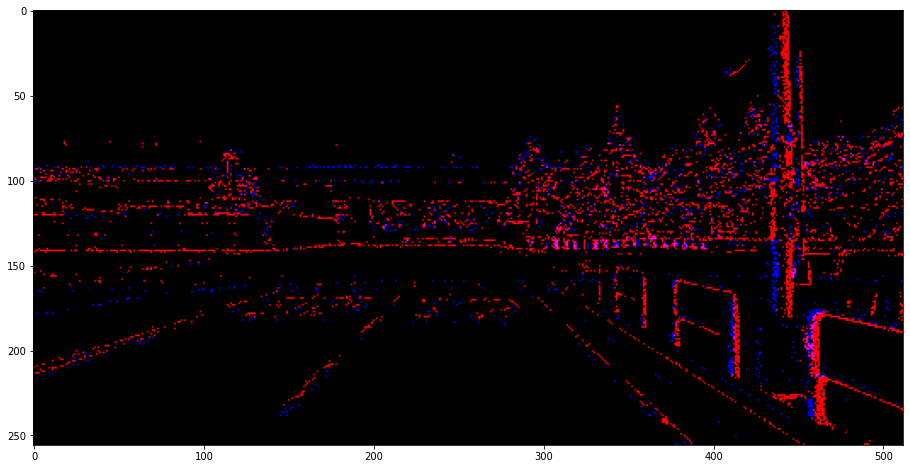

In [50]:
plt.figure(figsize=(20,8))
plt.imshow(total_image)

In [ ]:
zeros_input = np.zeros_like(input_data)
total_image = np.concatenate((negativ_input[:, :, None], zeros_input[:, :, None], positiv_input[:, :, None]), axis=2)

In [55]:
import torch
a = torch.tensor([[0,0],[0,0]])
list(a.shape)

[2, 2]